# Ethereum Cryopto Trend Analysis with OpenBB

## Description
This notebook showcases the application of technical analysis techniques to explore Ethereum price trends and volatility. It utilizes OpenBB's historical data to calculate and visualize moving averages, analyze trading volume, and assess price volatility. The notebook demonstrates how these tools can be employed to gain insights into market dynamics and potentially inform investment decisions.

#### Author
[MacBobby Chibuzor](https://github.com/theghostmac)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KwDtij9ln1UjdJOYKOGltUkaPctrqWGz?authuser=0#scrollTo=HeB3TlvkmFoK)

The dependencies for running this includes openbb, pandas, and matplotlib.



In [1]:
!pip install openbb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.1/268.1 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.5/102.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 83.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 k

Data fetched successfully!


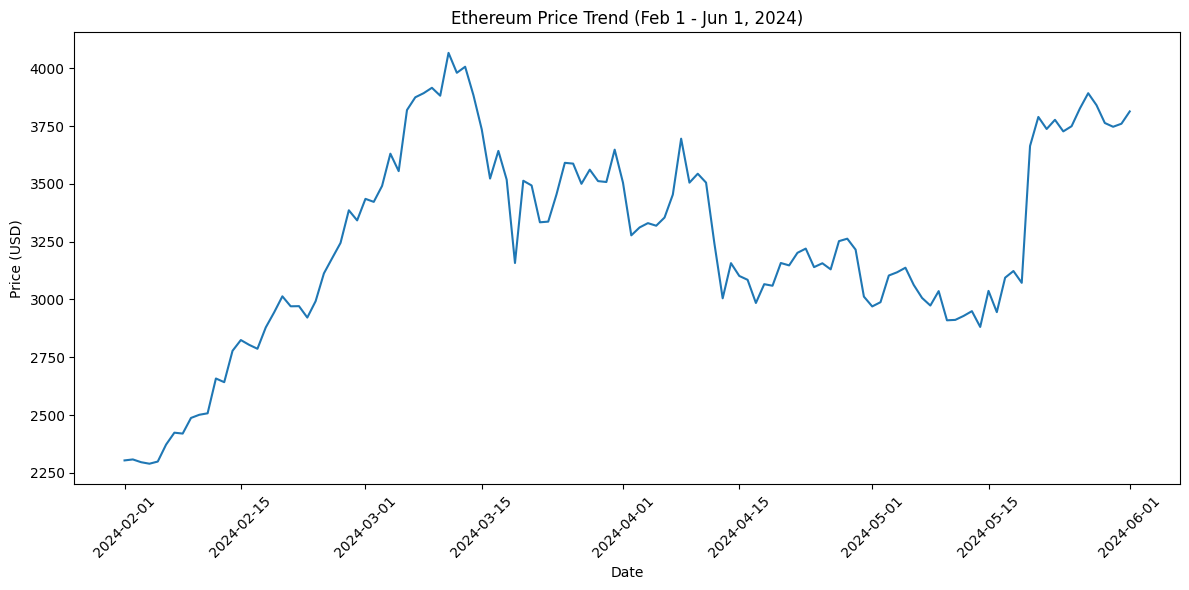

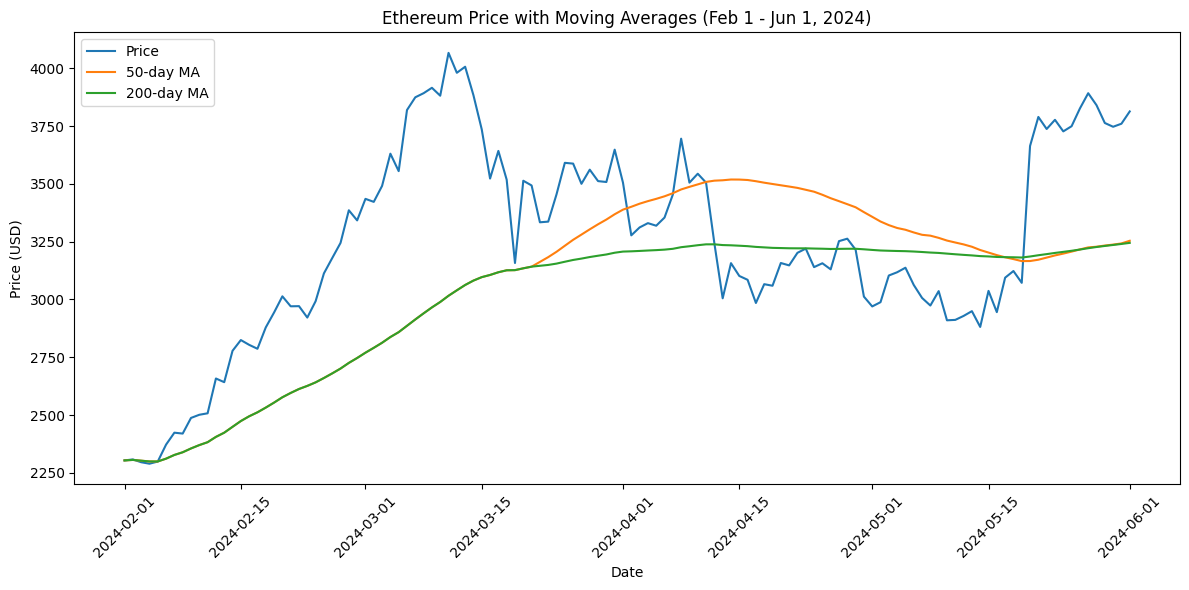

Analyzing Ethereum trading volume...


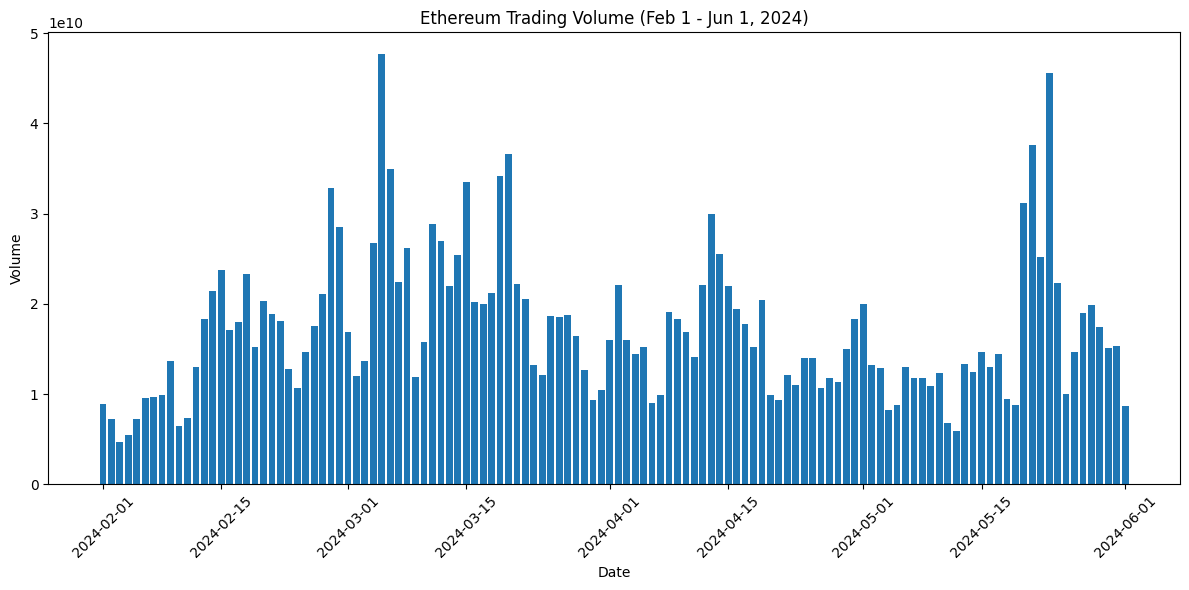

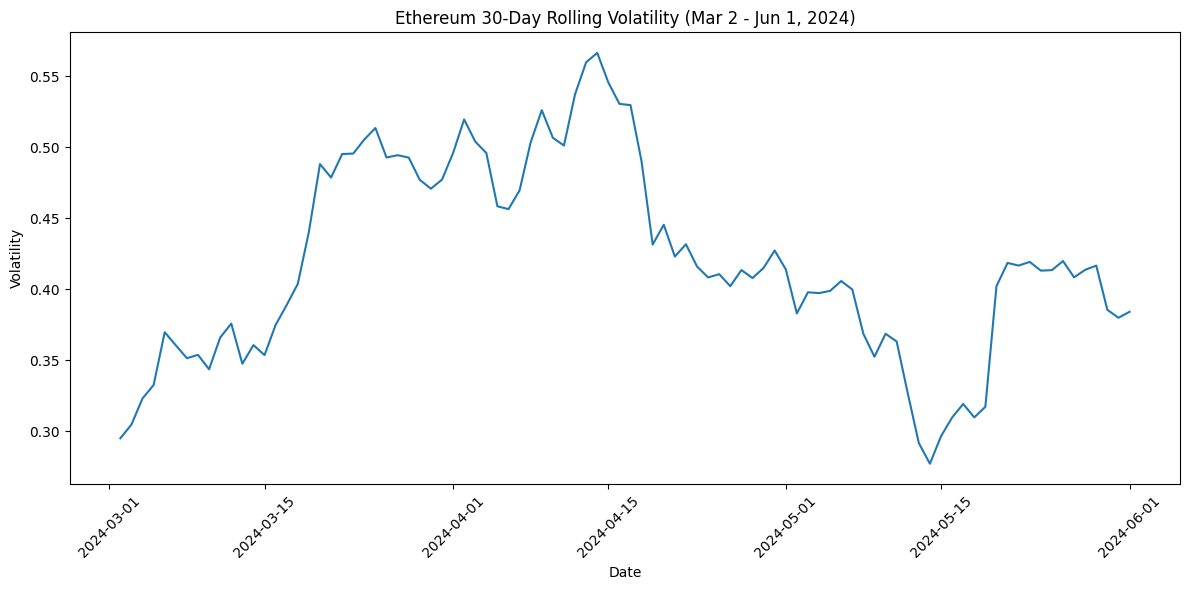

Ethereum price and volume analysis completed!


In [20]:
from openbb import obb
import pandas as pd
import matplotlib.pyplot as plt

print("Data fetched successfully!")  # More specific than "No errors!"

# Download historical Ethereum (ETH) to USD price data for a specific period.
btc_data = obb.crypto.price.historical(symbol='ETH-USD', interval='1d', start_date='2024-02-01', end_date='2024-06-01')

# Extract dates and closing prices from the downloaded data
dates = [data.date for data in btc_data.results]
prices = [data.close for data in btc_data.results]
volumes = [data.volume for data in btc_data.results]

# Visualize the Ethereum price trend
plt.figure(figsize=(12, 6))
plt.plot(dates, prices)
plt.title('Ethereum Price Trend (Feb 1 - Jun 1, 2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Function to calculate Simple Moving Average (SMA) for a given window
def calculate_ma(data, window):
  """
  This function calculates the Simple Moving Average (SMA) of a time series data for a specified window size.
  """
  return [sum(data[max(i-window+1, 0):i+1])/min(i+1, window) for i in range(len(data))]

# Calculate 50-day and 200-day moving averages for closing prices
ma50 = calculate_ma(prices, 50)
ma200 = calculate_ma(prices, 200)

# Visualize the Ethereum price trend with moving averages
plt.figure(figsize=(12, 6))
plt.plot(dates, prices, label='Price')
plt.plot(dates, ma50, label='50-day MA')
plt.plot(dates, ma200, label='200-day MA')
plt.title('Ethereum Price with Moving Averages (Feb 1 - Jun 1, 2024)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Analyzing Ethereum trading volume...")

# Analyze daily trading volume for Ethereum
plt.figure(figsize=(12, 6))
plt.bar(dates, volumes)
plt.title('Ethereum Trading Volume (Feb 1 - Jun 1, 2024)')
plt.xlabel('Date')
plt.ylabel('Volume')  # Corrected label
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate daily returns and 30-day rolling volatility
daily_returns = [(prices[i] - prices[i-1])/prices[i-1] for i in range(1, len(prices))]
volatility = [std * (252 ** 0.5) for std in calculate_ma([abs(r) for r in daily_returns], 30)]

# Plot the 30-day rolling volatility of Ethereum prices
plt.figure(figsize=(12, 6))
plt.plot(dates[30:], volatility[29:])  # Skip the first 30 days due to rolling window
plt.title('Ethereum 30-Day Rolling Volatility (Mar 2 - Jun 1, 2024)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Ethereum price and volume analysis completed!")